<a href="https://colab.research.google.com/github/alberttuwan1/AOL_DB/blob/main/hymenoptera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Albert Gabriel Tuwan <br>
NIM: 2502001353

# Downloading Data from Kaggle

In [ ]:
! pip install -q kaggle

! mkdir ~/.kaggle

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# I use my API credential to connect to kaggle
! cp /content/drive/MyDrive/kaggle_API_credential/kaggle.json ~/.kaggle/kaggle.json

! kaggle datasets download -d ajayrana/hymenoptera-data
! unzip -q hymenoptera-data.zip
! rm -r hymenoptera-data.zip
! rm -r hymenoptera_data/hymenoptera_data

Mounted at /content/drive
100% 90.0M/90.2M [00:01<00:00, 82.4MB/s]
100% 90.2M/90.2M [00:01<00:00, 90.8MB/s]


# Import Library

In [ ]:
# Showing plot
import matplotlib.pyplot as plt

# Reading data
import pathlib
from pathlib import Path

# Showing image data
from PIL import Image
from tensorflow.keras.preprocessing import image
import random


# CNN Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

random.seed(42)

# Data Exploration

In [ ]:
dir = Path('/content')

# Input the path of the image of the train data to a list
train_ants = list(dir.rglob('train/ants/*.jpg'))
train_bees = list(dir.rglob('train/bees/*.jpg'))

print(f'Total train ants data: {len(train_ants)}')
print(f'Total train bees data: {len(train_bees)}')

# Input the path of the image of the validation data to a list
val_ants = list(dir.rglob('val/ants/*.jpg'))
val_bees = list(dir.rglob('val/bees/*.jpg'))

print('\n=================================================\n')
print(f'Total val ants data: {len(val_ants)}')
print(f'Total val bees data: {len(val_bees)}')

Total train ants data: 122
Total train bees data: 121


Total val ants data: 70
Total val bees data: 83


Image of an ant


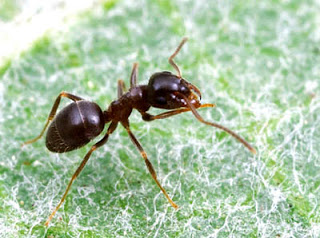

In [ ]:
# Show random image data of an ant
print('Image of an ant')
Image.open(train_ants[random.randint(0, len(train_ants)-1)])

Image of a bee


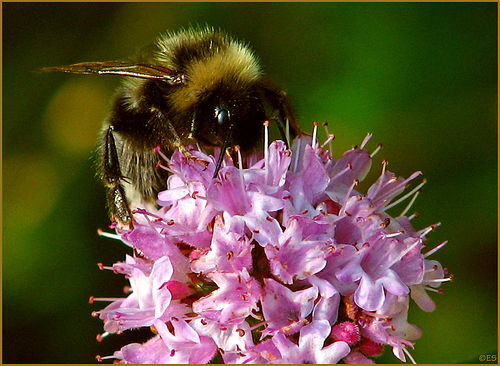

In [ ]:
# Show random image data of a bee
print('Image of a bee')
Image.open(train_bees[random.randint(0, len(train_bees)-1)])

In [ ]:
# Find the minimum and maximum height and weight of all the image

path_all = (train_ants,
            train_bees,
            val_ants,
            val_bees)

var_name =('train_ants',
            'train_bees',
            'val_ants',
            'val_bees')

for path, name in zip(path_all, var_name):
  min_width, min_height = float('inf'), float('inf')
  max_width, max_height = 0, 0

  for image_path in path:
      img = Image.open(image_path)
      width, height = img.size
      min_width = min(min_width, width)
      min_height = min(min_height, height)
      max_width = max(max_width, width)
      max_height = max(max_height, height)

  # Print the results
  print(f'{name}\n')
  print("Minimum Width:", min_width)
  print("Minimum Height:", min_height)
  print("Maximum Width:", max_width)
  print("Maximum Height:", max_height)
  print('\n=================================================\n')

train_ants

Minimum Width: 199
Minimum Height: 137
Maximum Width: 1488
Maximum Height: 1984


train_bees

Minimum Width: 311
Minimum Height: 173
Maximum Width: 500
Maximum Height: 500


val_ants

Minimum Width: 333
Minimum Height: 199
Maximum Width: 2592
Maximum Height: 1944


val_bees

Minimum Width: 328
Minimum Height: 272
Maximum Width: 800
Maximum Height: 533




# CNN Model Training and Evaluation

In [ ]:
cnn_model = keras.Sequential([Conv2D(32, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                              MaxPooling2D((2, 2)),
                              Conv2D(64, (3, 3), activation = 'relu'),
                              MaxPooling2D((2, 2)),
                              Conv2D(128, (3, 3), activation ='relu'),
                              MaxPooling2D((2, 2)),
                              Conv2D(256, (3, 3), activation = 'relu'),
                              MaxPooling2D((2, 2)),
                              GlobalAveragePooling2D(),
                              Dropout(0.25),
                              Dense(256, activation = 'relu'),
                              Dense(64, activation = 'relu'),
                              Dense(1, activation = 'sigmoid')])

cnn_model.summary()

cnn_model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['binary_accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 149, 149, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 35, 35, 128)      

In [ ]:
# Data augmentation

ds_train = ImageDataGenerator(rescale = 1.0/255,
                              horizontal_flip = True,
                              vertical_flip = True,
                              brightness_range = [0.1, 1.9],
                              zoom_range = 0.5,
                              rotation_range = 45)

ds_val = ImageDataGenerator(rescale = 1.0/255)

ds_train_augment = ds_train.flow_from_directory('hymenoptera_data/train',
                                                target_size = (300, 300),
                                                batch_size = 16,
                                                class_mode = 'binary')

ds_val_augment = ds_val.flow_from_directory('hymenoptera_data/val',
                                            target_size = (300, 300),
                                            batch_size = 16,
                                            class_mode = 'binary')

Found 244 images belonging to 2 classes.
Found 153 images belonging to 2 classes.


Since the number of data is too little and to avoid the model to be fooled. I will try to create augment data.

In [ ]:
# Model Trainning


history = cnn_model.fit(ds_train_augment,
                        epochs = 100,
                        validation_data = ds_val_augment,
                        callbacks =
                        )

Epoch 1/100
16/16 [==============================] - 11s 459ms/step - loss: 0.6942 - binary_accuracy: 0.4713 - val_loss: 0.6861 - val_binary_accuracy: 0.5752
Epoch 2/100
16/16 [==============================] - 11s 717ms/step - loss: 0.6789 - binary_accuracy: 0.5410 - val_loss: 0.7878 - val_binary_accuracy: 0.5882
Epoch 3/100
16/16 [==============================] - 11s 735ms/step - loss: 0.6572 - binary_accuracy: 0.6025 - val_loss: 0.6737 - val_binary_accuracy: 0.5490
Epoch 4/100
16/16 [==============================] - 7s 422ms/step - loss: 0.6594 - binary_accuracy: 0.6189 - val_loss: 0.6790 - val_binary_accuracy: 0.5686
Epoch 5/100
16/16 [==============================] - 9s 546ms/step - loss: 0.6396 - binary_accuracy: 0.6189 - val_loss: 0.6808 - val_binary_accuracy: 0.5294
Epoch 6/100
16/16 [==============================] - 7s 417ms/step - loss: 0.6456 - binary_accuracy: 0.6352 - val_loss: 0.7083 - val_binary_accuracy: 0.5490
Epoch 7/100
16/16 [==============================] - 9s

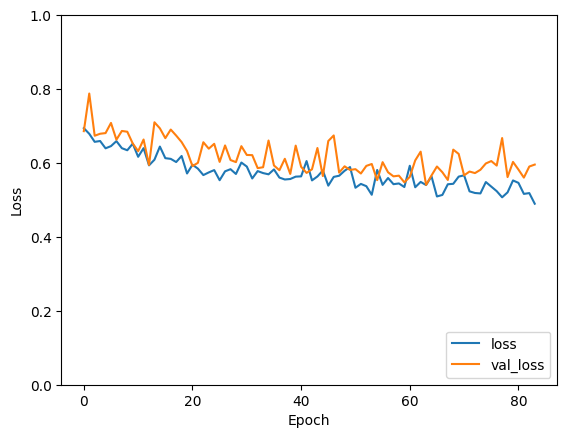

In [ ]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc = 'lower right')
plt.show()

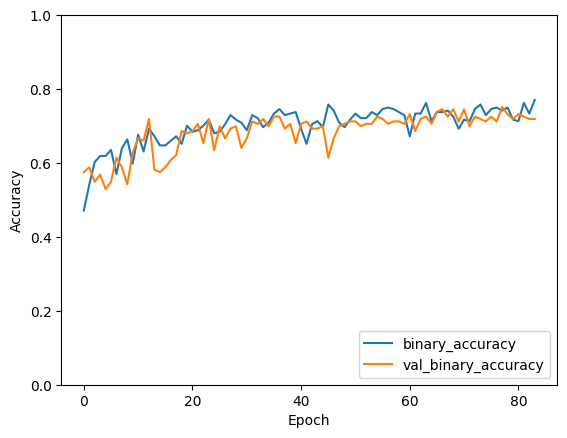

In [ ]:
plt.plot(history.history['binary_accuracy'], label = 'binary_accuracy')
plt.plot(history.history['val_binary_accuracy'], label = 'val_binary_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
import pandas as pd

# Since we restore the best weight, The performance of the last epoch is
# the second last data, while the last data is the best perfomance
pd.DataFrame(history.history).tail(2)

,loss,binary_accuracy,val_loss,val_binary_accuracy
82,0.518470,0.733607,0.590335,0.718954
83,0.489761,0.770492,0.595629,0.718954


Analysis
1. The model is underfit which is signed by stagnation of the training loss (at high value) and accuracy.

2. Model Performance
- 2.1 The overall performance of the last epoch is
 - Training_loss: 0.518470
 - Traning_binary_accuracy: 0.733607
 - Validation_loss: 0.590335
 - Validation_binary_accuracy: 0.718954

- 2.2 However, the best performance is the model of end of 28th epoch which is
 - Training_loss: 0.489761
 - Traning_binary_accuracy: 0.770492
 - Validation_loss: 0.595629
 - Validation_binary_accuracy: 0.718954
<br>From the evaluation result, our model has shown a litte potential to distinguish ant image from bee image.
3. For further improvement, I recognize that the number of data is insufficient for the CNN model to be able to have adequate feature extraction ability. Accordingly, we can use transfer learning to transfer the knowledge of pre-trained model to our model to cover up the shortage of training data.